*prepared by Eric Kimwatan*

## Introduction

This notebook is an analysis of the cardiovascular disease mortality rates in the USA and its relationship with nutrition and physical activity from the below datasets:
- https://www.kaggle.com/spittman1248/cdc-data-nutrition-physical-activity-obesity (provided)
- Covid19 dataset(USA) provided by the Centre for Diseaese Control and Protection.https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36 (external)
- Cardiovascular deaths dataset provided by the Centre for Diseaese Control and Protection https://chronicdata.cdc.gov/Heart-Disease-Stroke-Prevention/National-Vital-Statistics-System-NVSS-National-Car/kztq-p2jf(external)

In this notebook, I perform the below activites:
- I investigate the sample sizes and their distibutions
- I investigate the Quetions/Topics and distribution per state
- I investigate Obesity and Activity topics and their distibutions
- I introduce external datasets ie. Coronavirus deaths and new cases per state & cardiovascular deaths per 100000 adults in the USA
- I investigate whether obesity, activity and fruit and vegetable consumption can predict coronavirus and cardiovascular deaths

NOTE: The notebook contains EDA and Feature engineering and selection tasks only.

## Exploratory Data Analysis

In [1202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker, GeoJson
from folium.plugins import HeatMap, MarkerCluster


In [1203]:
#reading data
data = pd.read_csv('data.csv')

In [1204]:
#Looking at the first 5 rows of data
data.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [1205]:
#Getting some information about the dataset columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [1206]:
#Looking at the questions asked during the survey

questions = data['Question'].unique()
print(f"There are {len(questions)} Questions covered in the survey and they are: \n{ questions}")

There are 9 Questions covered in the survey and they are: 
['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults who report consuming fruit less than one time daily'
 'Percent of adults who report consuming vegetables less than one time daily'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activ

In [1207]:
#Looking at the period covered by the survey data in years

period = data['YearStart'].unique()
print(f'The period covered is from {min(period)} to {max(period)}')

The period covered is from 2011 to 2016


In [1208]:
#Looking at the unique topic covered by the survey

topics = data['Topic'].unique()
print(f'There are a total of {len(topics)} topics and they are as below \n{topics}')

There are a total of 3 topics and they are as below 
['Obesity / Weight Status' 'Fruits and Vegetables - Behavior'
 'Physical Activity - Behavior']


In [1209]:
#Looking at the locations covered in the survey

locations = data['LocationDesc'].unique()
print(f'There are {len(locations)} locations. They are as below \n {locations}')

There are 55 locations. They are as below 
 ['Alabama' 'National' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Connecticut' 'Colorado' 'Delaware' 'Florida' 'District of Columbia'
 'Georgia' 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'West Virginia' 'Washington' 'Wisconsin' 'Wyoming'
 'Virgin Islands']


In [1210]:
#Looking at the stratification categories the samples were grouped into
categories = data['StratificationCategory1'].unique()
print(f"There are {len(categories)} stratification categories as below \n {categories}")


There are 6 stratification categories as below 
 ['Total' 'Gender' 'Education' 'Age (years)' 'Income' 'Race/Ethnicity']


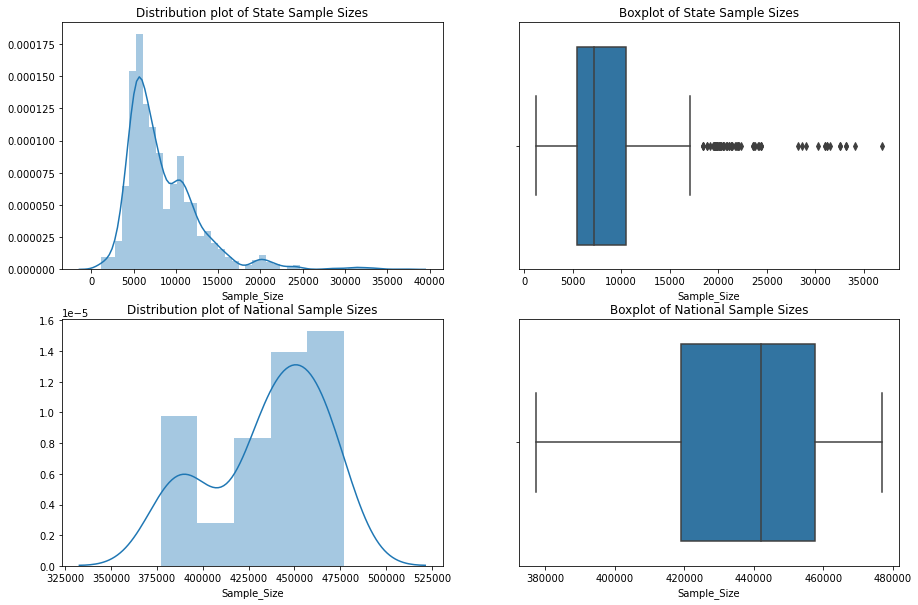

In [1211]:
# Looking at the distributions of the Total sample sizes in states and Nationally

state_samples =data[(data['Total']=='Total')&(data['LocationDesc']!='National')]['Sample_Size']
national_samples = data[(data['Total']=='Total')&(data['LocationDesc']=='National')]['Sample_Size']
fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes[0][0].set_title('Distribution plot of State Sample Sizes')
axes[0][1].set_title('Boxplot of State Sample Sizes')
axes[1][0].set_title('Distribution plot of National Sample Sizes')
axes[1][1].set_title('Boxplot of National Sample Sizes')

sns.distplot(state_samples, ax=axes[0][0])
sns.boxplot(state_samples, ax=axes[0][1])
sns.distplot(national_samples, ax=axes[1][0])
sns.boxplot(national_samples, ax=axes[1][1])


There appears to be outliers in the state sample sizes. This might be attributed to states with higher population and hence larger sample sizes. I will investigate this further.

In [1212]:
#Find outliers i.e Any values more than Third-Quatile+1.5*Inter-Quatile-Range following Turkeys rule since 
#the distribution is skewed

states_iqr = scipy.stats.iqr(state_samples.values)
Q3 = np.quantile(state_samples, 0.75)

outlier_states = data[(data['Total']=='Total')&(data['Sample_Size']>1.5*Q3)]
#dropping 'National' samples
outlier_states = outlier_states.drop(outlier_states[outlier_states['LocationDesc']=='National'].index)
print(f"The states with higher than normal \
      samples sizes are \n{outlier_states['LocationDesc'].unique()}")


The states with higher than normal       samples sizes are 
['California' 'Florida' 'Kansas' 'Massachusetts' 'Minnesota' 'Nebraska'
 'New Jersey' 'Pennsylvania' 'Maryland' 'New York']


The states with higher sample sizes are also the states with the highest population sizes. This is expected.

Investigating the Questions

In [1213]:
obesity = data[data['Question']=='Percent of adults aged 18 years and older who have obesity']
no_activity = data[data['Question']=='Percent of adults who engage in no leisure-time physical activity']
no_fruit = data[data['Question']=='Percent of adults who report consuming fruit less than one time daily']
no_vegetables = data[data['Question']=='Percent of adults who report consuming vegetables less than one time daily']
very_active = data[data['Question']=='Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)']

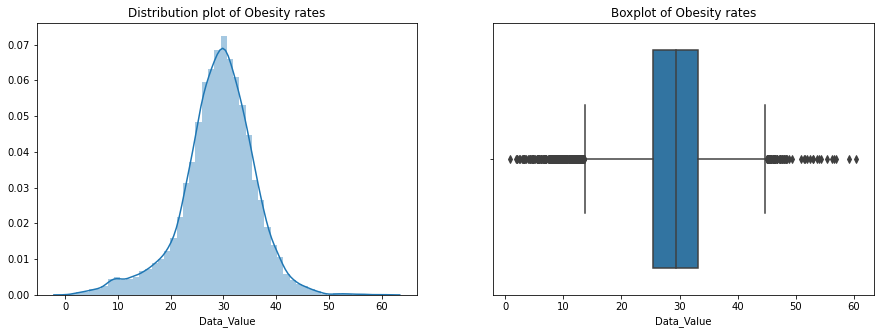

In [1214]:
#Distribution of obesity values

obesity_v = obesity['Data_Value']
obesity_v_new = obesity_v[~np.isnan(obesity_v)]

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Distribution plot of Obesity rates')
axes[1].set_title('Boxplot of Obesity rates')

sns.distplot(obesity_v_new, ax=axes[0])
sns.boxplot(obesity_v_new, ax=axes[1])



The plots appear normally distributed with presense of some outliers.

Investigating the top 10 and bottom 10 States in terms of obesity

In [1215]:
obesity = obesity[obesity['Total']=='Total']
obesity_states = pd.DataFrame(obesity.groupby(["LocationAbbr"])["Data_Value"].mean())
#drop 'Virgin islands' since it only has one data entry.
obesity_states = obesity_states.drop(obesity_states.loc[obesity_states.index=='VI'].index)
#ranking the top and bottom 10 states in terms of obesity

sorted_states = obesity_states.sort_values(by='Data_Value', ascending=False)
sorted_states = sorted_states.reset_index()

sorted_states_10 = sorted_states.head(10)
sorted_states_bottom = sorted_states.tail(10)

Text(0, 0.5, '% of Obese Adults')

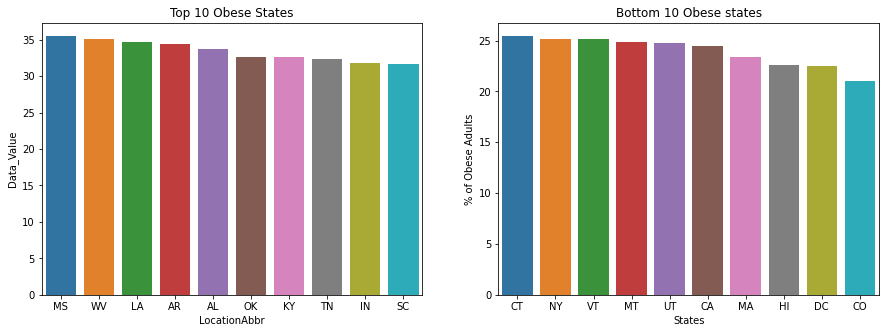

In [1216]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Top 10 Obese States')
axes[1].set_title('Bottom 10 Obese states')



sns.barplot(data= sorted_states_10, x='LocationAbbr', y='Data_Value', ax=axes[0])
plt.xlabel('States')
sns.barplot(data= sorted_states_bottom, x='LocationAbbr', y='Data_Value', ax=axes[1])
plt.xlabel('States')
plt.ylabel('% of Obese Adults')


I will now investigate the obesity rate progression in the top 10 states of interest over the years

In [1217]:
#Investingating obesity progression over the years in the top 10 states
interesting_states = list(sorted_states_10['LocationAbbr'].values)

obesity_df = pd.DataFrame(obesity.groupby(["LocationAbbr", "YearStart"])["Data_Value"].mean())


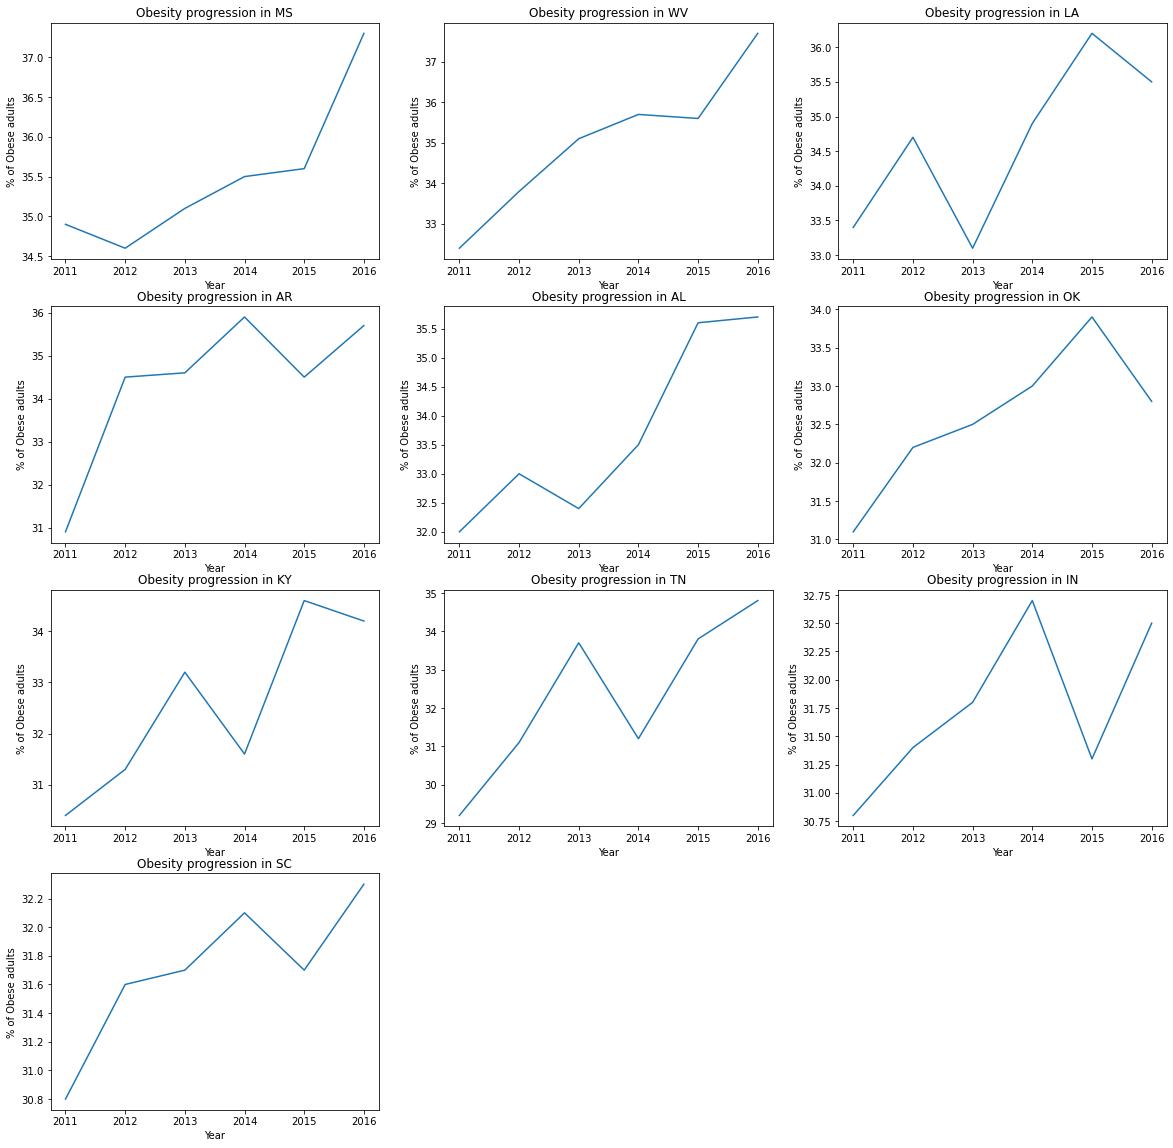

In [1218]:
#Plotting the progression of obesity over the years in the top 10 states
plt.figure(figsize=(20,20))

for i, state in enumerate(interesting_states):
    plt.subplot(4, 3, i+1)
    
    plt.plot(obesity_df.loc[state])
    plt.title('Obesity progression in'+' ' +state)
    plt.xlabel('Year')
    plt.ylabel('% of Obese adults')
plt.show()

Text(0.5, 1.0, 'Obesity progression Nationally')

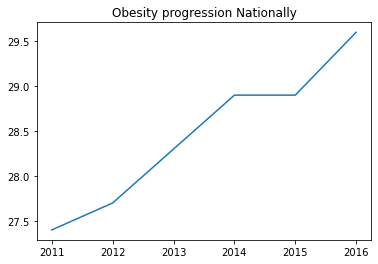

In [1219]:
#Plotting obesity rate nationally to compare with the trend in the individual states
plt.plot(obesity_df.loc['US'])
plt.title('Obesity progression Nationally')

The states appear to have a general upward trend that is consistent with the National trend.

In [1220]:
#Mean obesity rate visualized as a map
obesity_geo = pd.DataFrame(obesity.groupby(["LocationAbbr"])["Data_Value"].mean())
obesity_geo = obesity_geo.reset_index()
obesity_geo.columns = ['State', 'Obesity_perc']
obesity_geo.head()

,State,Obesity_perc
0,AK,28.733333
1,AL,33.700000
2,AR,34.350000
3,AZ,27.366667
4,CA,24.466667


In [1221]:
#Plotting the chloropleth map of obesity by state
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

#A function to plot the cloropleth maps.For reusability of code
def plot_map(df, title):
    m = folium.Map(location=[48, -102], zoom_start=4)
    column_list = df.columns
    folium.Choropleth(
        geo_data=state_geo,
        name='choropleth',
        data=df,
        columns=[column_list[0], column_list[1]],
        key_on='feature.id',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='% of'+" "+title+' adults'
    ).add_to(m)

    folium.LayerControl().add_to(m)

    return m


In [1222]:
plot_map(obesity_geo, 'obese')

Looking at Activity

In [1223]:
total_inactivity = no_activity[no_activity['Total']=='Total']

Text(0.5, 0, '% of adults with no activity')

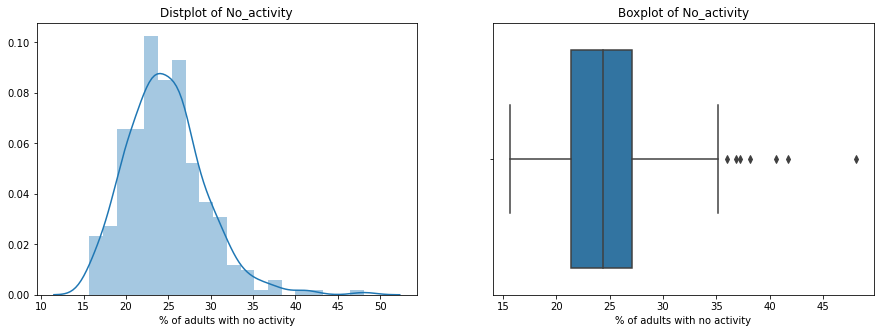

In [1224]:
#Looking at the distribution of the percentage of adults who do not participate in any leisure time activity
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(total_inactivity['Data_Value'], ax=axes[1])
sns.distplot(total_inactivity['Data_Value'], ax=axes[0])
axes[0].set_title('Distplot of No_activity')
axes[0].set_xlabel('% of adults with no activity')
axes[1].set_title('Boxplot of No_activity')
axes[1].set_xlabel('% of adults with no activity')

Text(0, 0.5, '% of Inactive Adults')

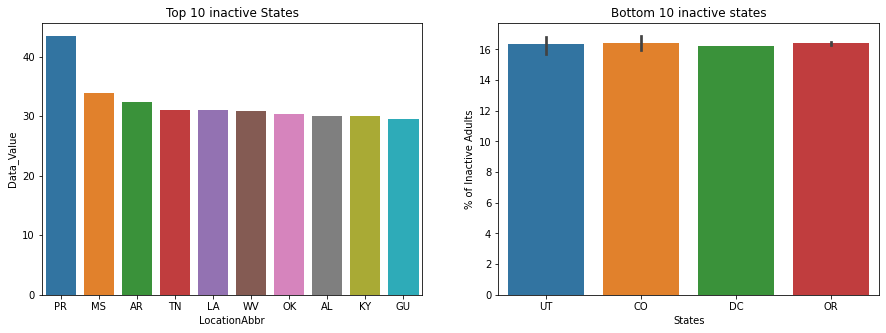

In [1225]:
#Looking at the most inactive and least inactive states

total_inactivity_df = pd.DataFrame(total_inactivity.groupby('LocationAbbr')['Data_Value'].mean())
total_inactivity_df = total_inactivity_df.reset_index()
top_inactivity = total_inactivity_df.sort_values(by='Data_Value', ascending=False).head(10)
bottom_inactivity = total_inactivity.sort_values(by='Data_Value', ascending=True).head(10)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Top 10 inactive States')
axes[1].set_title('Bottom 10 inactive states')



sns.barplot(data= top_inactivity, x='LocationAbbr', y='Data_Value', ax=axes[0])
plt.xlabel('States')
sns.barplot(data= bottom_inactivity, x='LocationAbbr', y='Data_Value', ax=axes[1])
plt.xlabel('States')
plt.ylabel('% of Inactive Adults')



In [1226]:
#Plotting % of inactive adults per state

plot_map(total_inactivity_df, 'Inactive')

I would like to investigate whether there is any relationship between the topics covered in the 
survey ie. Obesity, fruits and vegetables and physical activity and the impact of the Coranavirus(Covid19)
which is known to affect individuals with underlying health issues more. All topics in this survey 
are related to health and wellness. 
I will use an additional dataset from Centre of Disease Control and Prevention
(https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36)

In [1227]:
covid_df = pd.read_csv('resources/covid.csv')

In [1228]:
covid_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [1229]:
#grouping the dataset by State and calculating the total deaths as of 28th November 2020
#covid_state = pd.DataFrame(covid_df.groupby('state')['new_death'].sum())

covid_state = pd.DataFrame(covid_df.groupby('state').agg({'new_death':np.sum, 'new_case':np.sum}))

covid_state = covid_state.reset_index()
covid_state.columns = ['state', 'covid_deaths','new_case']
covid_state.head()

,state,covid_deaths,new_case
0,AK,118,28892
1,AL,3572,241957
2,AR,2436,152625
3,AS,0,3
4,AZ,6568,314326


### Is there a relationship between obesity, fruit/vegetables consumption, activity and Covid19?

Preparing the Obesity, No_activity, no_fruits, no_vegetables and very_active numbers per state

In [1230]:
#Reading the dataset and preprocessing
data_2 = pd.read_csv('data.csv')

#Reading the different questions as Dataframes
obesity_2 = data_2[data_2['Question']=='Percent of adults aged 18 years and older who have obesity']
no_activity_2 = data_2[data_2['Question']=='Percent of adults who engage in no leisure-time physical activity']
no_fruit_2 = data_2[data_2['Question']=='Percent of adults who report consuming fruit less than one time daily']
no_vegetables_2 = data_2[data_2['Question']=='Percent of adults who report consuming vegetables less than one time daily']
very_active_2 = data_2[data_2['Question']=='Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)']
inactive_2 = data_2[data_2['Question']=='Percent of adults who engage in no leisure-time physical activity']


no_fruit_total = no_fruit_2[no_fruit_2['StratificationID1']=='AGEYR65PLUS']
no_fruits_df = pd.DataFrame(no_fruit_total.groupby('LocationAbbr')['Data_Value'].mean())
no_fruits_df = no_fruits_df.reset_index()
no_fruits_df.columns = ['LocationAbbr', '%_no_fruits']

no_vegetables_total = no_vegetables_2[no_vegetables_2['StratificationID1']=='AGEYR65PLUS']
no_vegetables_df = pd.DataFrame(no_vegetables_total.groupby('LocationAbbr')['Data_Value'].mean())
no_vegetables_df = no_vegetables_df.reset_index()
no_vegetables_df.columns = ['LocationAbbr', '%_no_vegetables']

very_active_total = very_active_2[very_active_2['StratificationID1']=='AGEYR65PLUS']
very_active_df = pd.DataFrame(very_active_total.groupby('LocationAbbr')['Data_Value'].mean())
very_active_df = very_active_df.reset_index()
very_active_df.columns = ['LocationAbbr', '%_very_active']

obesity_over65 = obesity_2[obesity_2['StratificationID1']=='AGEYR65PLUS']
obesity_df = pd.DataFrame(obesity_over65.groupby('LocationAbbr')['Data_Value'].mean())
obesity_df = obesity_df.reset_index()
obesity_df.columns = ['LocationAbbr', '%_obsese']



inactivity_total = inactive_2[inactive_2['StratificationID1']=='AGEYR65PLUS']
inactive_df = pd.DataFrame(inactivity_total.groupby('LocationAbbr')['Data_Value'].mean())
inactive_df = inactive_df.reset_index()
inactive_df.columns = ['LocationAbbr', '%_inactive']


In [1231]:

#Joining the dataframes into one
from functools import reduce
dfs = [obesity_df,inactive_df,no_fruits_df, no_vegetables_df, very_active_df]

final_df = reduce(lambda left, right: pd.merge(left, right, on='LocationAbbr'), dfs)

In [1232]:
final_df.shape

(54, 6)

Joining the Covid Dataset with the Obesity, activity

In [1233]:
#Adding Covid dataset to the merged dataframes

merged = pd.merge(covid_state, final_df, how='inner', left_on='state', right_on='LocationAbbr')
merged = merged.drop('LocationAbbr', axis=1)

In [1234]:
merged.head()

,state,covid_deaths,new_case,%_obsese,%_inactive,%_no_fruits,%_no_vegetables,%_very_active
0,AK,118,28892,31.016667,28.383333,32.700000,19.433333,41.300000
1,AL,3572,241957,28.516667,35.933333,36.500000,23.433333,31.166667
2,AR,2436,152625,27.500000,39.916667,39.600000,23.666667,32.100000
3,AZ,6568,314326,23.866667,27.983333,30.700000,19.966667,45.100000
4,CA,18979,1158689,22.450000,24.750000,26.266667,15.266667,47.200000


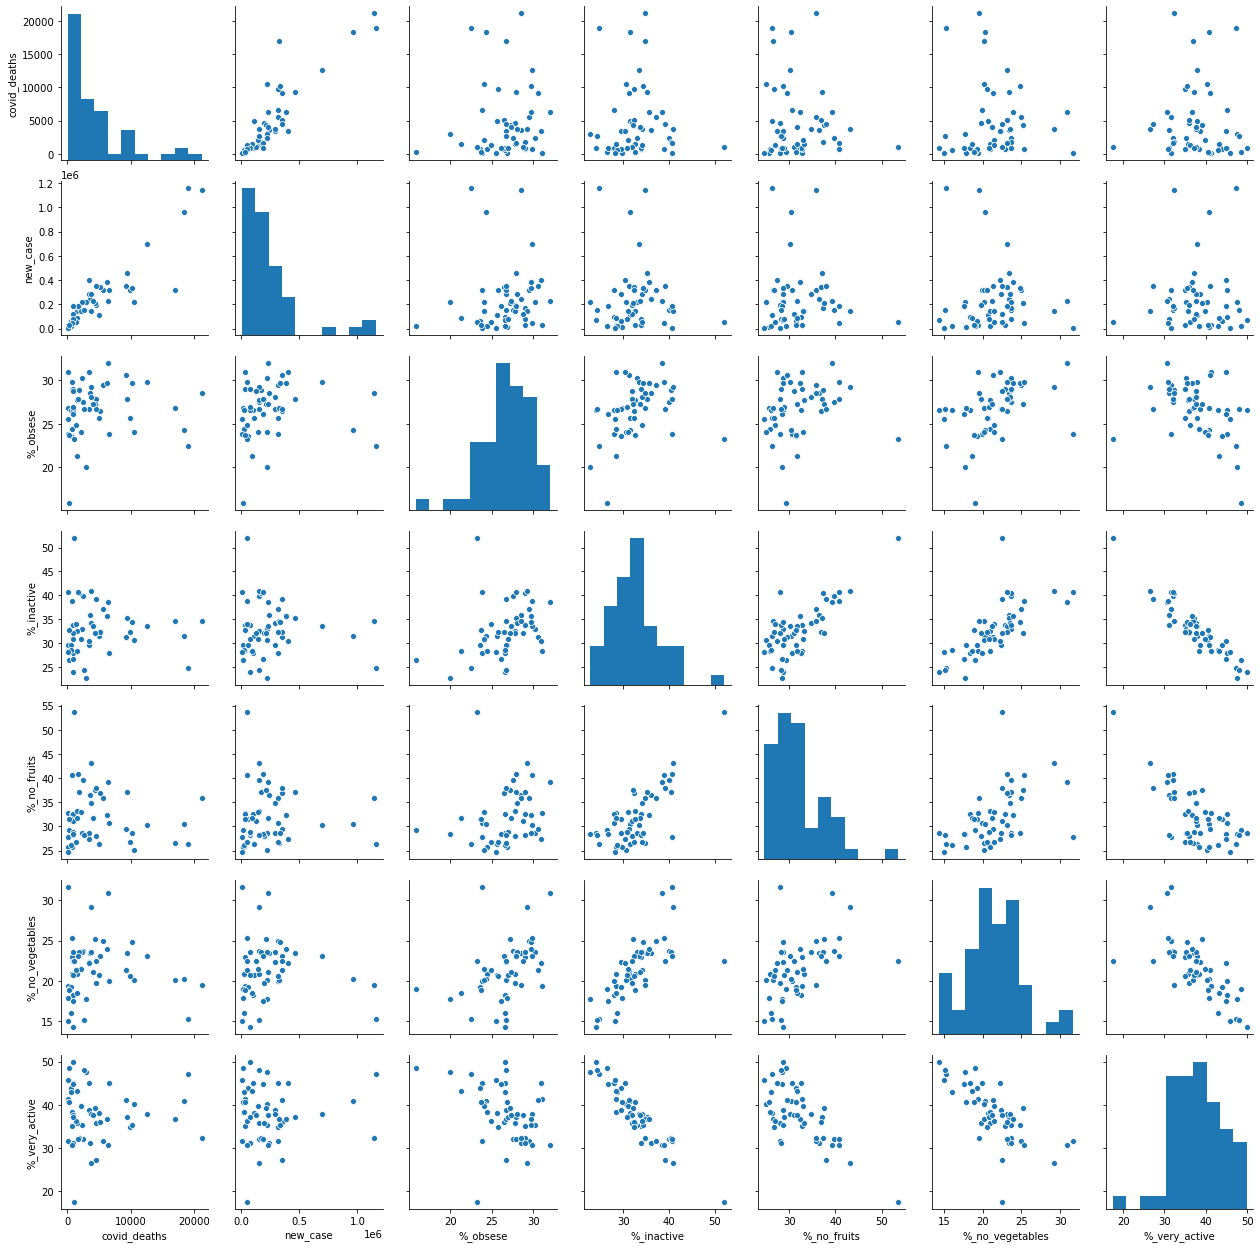

In [1235]:
#Visualizing relationships in the new dataframe

sns.pairplot(merged)

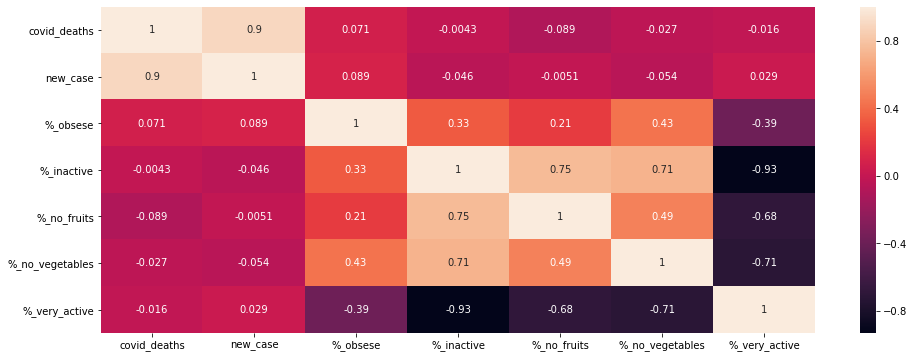

In [1236]:
plt.figure(figsize=(16,6))
sns.heatmap(merged.corr(), annot=True)

In [1237]:
#Viewing the raw correlation figures
merged.corr()

,covid_deaths,new_case,%_obsese,%_inactive,%_no_fruits,%_no_vegetables,%_very_active
covid_deaths,1.000000,0.896476,0.070575,-0.004310,-0.088875,-0.026737,-0.016025
new_case,0.896476,1.000000,0.088974,-0.045739,-0.005054,-0.054160,0.028580
%_obsese,0.070575,0.088974,1.000000,0.332828,0.211054,0.432023,-0.385806
%_inactive,-0.004310,-0.045739,0.332828,1.000000,0.752986,0.714738,-0.930732
%_no_fruits,-0.088875,-0.005054,0.211054,0.752986,1.000000,0.490745,-0.684703
%_no_vegetables,-0.026737,-0.054160,0.432023,0.714738,0.490745,1.000000,-0.712024
%_very_active,-0.016025,0.028580,-0.385806,-0.930732,-0.684703,-0.712024,1.000000


From the correlation plots, I can see that there is no correlation between Covid19 deaths and % of obese adults in the different states.
This could be because the data used is up to the year 2016 and the Covid19 pandemic occured in 2020 and therefore the data could be outdated and not a good representation of the relationship.

The data however does point out high negative correlations between the percentage of people who are very active and the percentage of people who eat less than one fruit a day. Meaning the more active people are, the more fruits they consume(the lower the number of people who done eat fruits).
There is also a strong linear negative relationship between the percentage of people who are very active and the percentage of those who eat vegetables less than once a day meaning the more active a state, the more vegetables are consumed.

## Is there a relationship between obesity, fruit/vegetable consumption and cardiovascular disease mortality rate?

To perform the analysis I got additional data from the Centre for Disease Control and prevention(https://chronicdata.cdc.gov/Heart-Disease-Stroke-Prevention/National-Vital-Statistics-System-NVSS-National-Car/kztq-p2jf)

In [1238]:
#Getting the data and viewing first few rows
disease = pd.read_csv('disease.csv')
disease.head()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2000,MT,Montana,NVSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Other,C1,T1,NV001,AgeStdz,BOC04,RAC07,30,POINT (-109.42442064499971 47.06652897200047)
1,2000,VT,Vermont,NVSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,75+,C1,T1,NV001,Crude,BOC03,AGE08,50,POINT (-72.51764079099962 43.62538123900049)
2,2002,OH,Ohio,NVSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,25-44,C1,T1,NV001,Crude,BOC03,AGE04,39,POINT (-82.40426005599966 40.06021014100048)
3,2003,DE,Delaware,NVSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,75+,C1,T1,NV001,Crude,BOC03,AGE08,10,POINT (-75.57774116799965 39.008830667000495)
4,2003,VT,Vermont,NVSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,75+,C1,T1,NV001,Crude,BOC03,AGE08,50,POINT (-72.51764079099962 43.62538123900049)


In [1239]:
#Getting Overal responses from the
cardiovascular = disease[(disease['Indicator']=='Rate of major cardiovascular disease mortality \
among US adults (18+); NVSS')&(disease['Break_Out_Category']=='Overall')]

cardio_df = pd.DataFrame(cardiovascular.groupby('LocationAbbr')['Data_Value'].mean())
cardio_df = cardio_df.reset_index()
cardio_df.columns=['LocationAbbr', 'rate/100000_adults']

In [1240]:
cardio_df.head()

,LocationAbbr,rate/100000_adults
0,AK,204.681579
1,AL,438.334211
2,AR,436.628947
3,AZ,292.584211
4,CA,314.342105


In [1241]:
#Joining the cardiovascular disease dataframe with the previous obesty, activity and fruit/vegetable dataset

cardio_merged = pd.merge(cardio_df, final_df, on='LocationAbbr')
cardio_merged.head()

,LocationAbbr,rate/100000_adults,%_obsese,%_inactive,%_no_fruits,%_no_vegetables,%_very_active
0,AK,204.681579,31.016667,28.383333,32.700000,19.433333,41.300000
1,AL,438.334211,28.516667,35.933333,36.500000,23.433333,31.166667
2,AR,436.628947,27.500000,39.916667,39.600000,23.666667,32.100000
3,AZ,292.584211,23.866667,27.983333,30.700000,19.966667,45.100000
4,CA,314.342105,22.450000,24.750000,26.266667,15.266667,47.200000


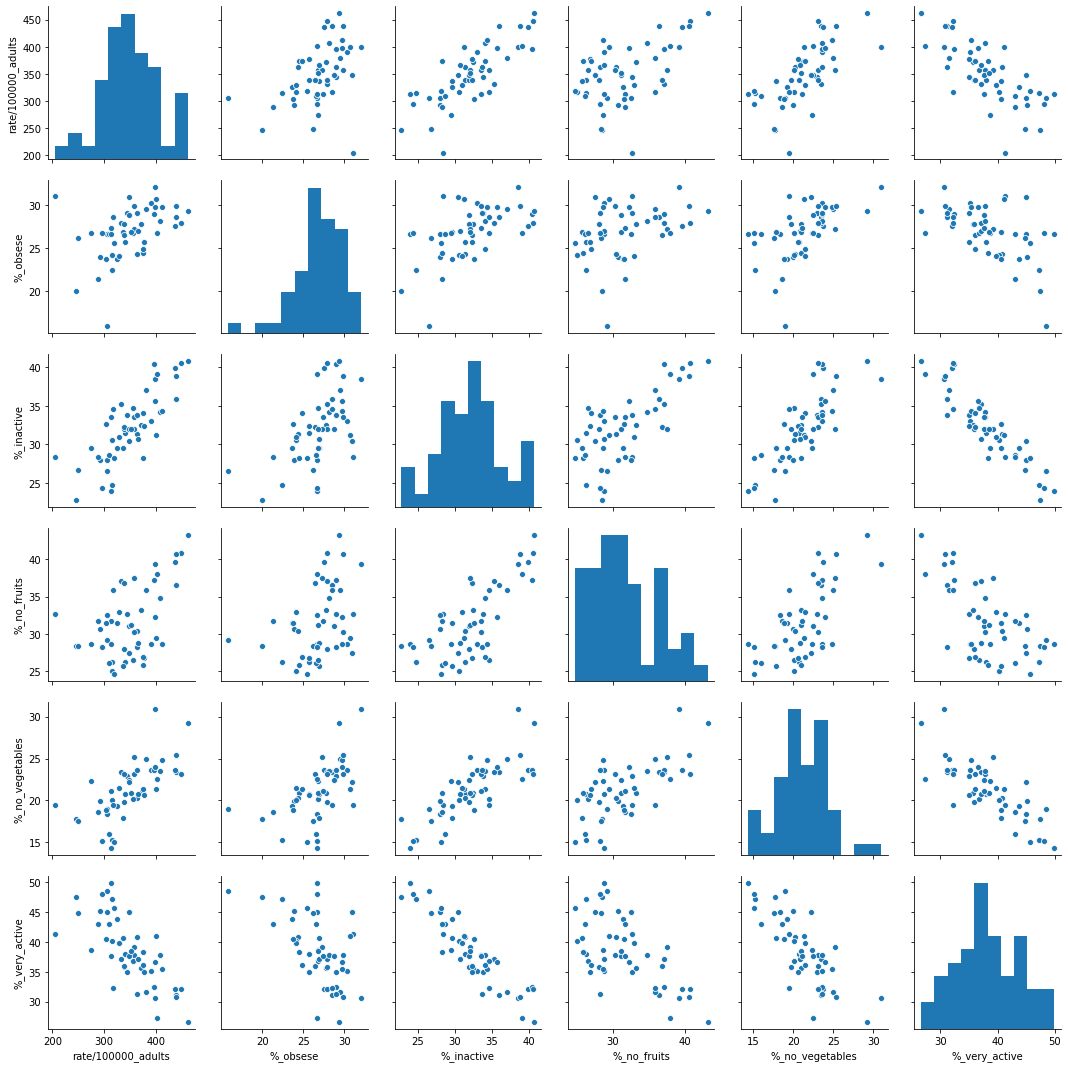

In [1242]:
sns.pairplot(cardio_merged)

In [1243]:
cardio_merged.corr()

,rate/100000_adults,%_obsese,%_inactive,%_no_fruits,%_no_vegetables,%_very_active
rate/100000_adults,1.000000,0.441770,0.789516,0.503919,0.676604,-0.725993
%_obsese,0.441770,1.000000,0.555058,0.352750,0.552645,-0.558370
%_inactive,0.789516,0.555058,1.000000,0.713774,0.797989,-0.913542
%_no_fruits,0.503919,0.352750,0.713774,1.000000,0.661457,-0.615540
%_no_vegetables,0.676604,0.552645,0.797989,0.661457,1.000000,-0.787936
%_very_active,-0.725993,-0.558370,-0.913542,-0.615540,-0.787936,1.000000


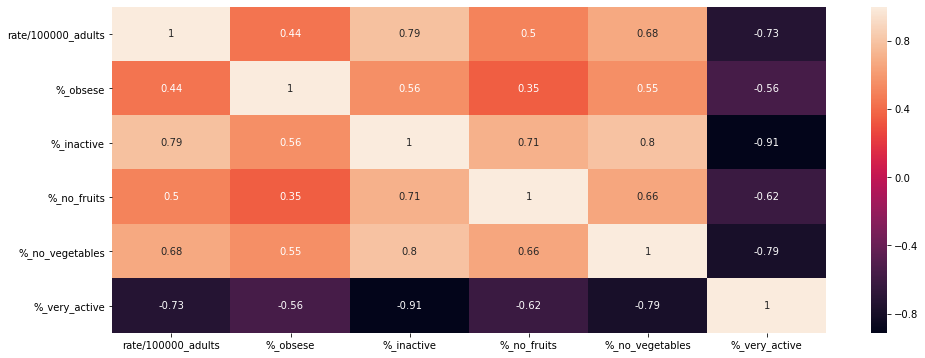

In [1244]:
plt.figure(figsize=(16, 6))
sns.heatmap(cardio_merged.corr(), annot=True)

From the correlation plot above, we can deduce that the mortality rate of adult people above 18yrs per 100,000 is highly correlated to the following:
- Percentage of inactive adults (possitive correlation)
- Percentage of adults who eat less than 1 fruit a day (positive correlation)
- Percentage of adults who eat vegetables less than once per day (positive correlation)
- Percentage of adults that are very active (Negative correlation)
And moderately correlate with:
- Percentage of obese adults (positive correlation)

We can therefore conclude that %_obesity, %_inactive, %_no_fruits, %_no_vegetables and %_very active are all possible predictors of the rate of major cardiovascular disease mortality among US adults

## Feature Engeneering

In [1245]:
#I will now perform feature engineering and selection for the prediction of cardiovascular 
#disease mortality among US adults

#Import the data afresh and instead of getting the aggregated numbers, get the individual records.

data_fe = pd.read_csv('data.csv')
disease_fe = pd.read_csv('disease.csv')

cardiovascular_fe = disease[(disease['Indicator']=='Rate of major cardiovascular disease mortality \
among US adults (18+); NVSS')&(disease['Break_Out_Category']=='Overall')&(disease['Data_Value_Type']=='Crude')][['Year','LocationAbbr','Data_Value']]

columns = ['YearStart', 'LocationAbbr', 'Data_Value']

obesity_fe = pd.DataFrame(data_fe[(data_fe['Question']=='Percent of adults aged 18 years and older who have obesity')&(data['Total']=='Total')][columns])
no_activity_fe = pd.DataFrame(data_fe[(data_fe['Question']=='Percent of adults who engage in no leisure-time physical activity')&(data['Total']=='Total')][columns])
no_fruit_fe = pd.DataFrame(data_fe[(data_fe['Question']=='Percent of adults who report consuming fruit less than one time daily')&(data['Total']=='Total')][columns])
no_vegetables_fe = pd.DataFrame(data_fe[(data_fe['Question']=='Percent of adults who report consuming vegetables less than one time daily')&(data['Total']=='Total')][columns])
very_active_fe = pd.DataFrame(data_fe[(data_fe['Question']=='Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)')&(data['Total']=='Total')][columns])


In [1246]:
from functools import reduce

question_df = [obesity_fe, no_activity_fe, no_fruit_fe, no_vegetables_fe,very_active_fe]
df_names=[ 'obesity','no_activity','no_fruit','no_vegetables','very_active']

#rename the columns to make it easier for merging
for i,j in zip(question_df, df_names):
    col = '%_'+j
    i.columns = ['Start_Year', 'LocationAbbr', col]

#Reset the index of the dataframes
for x in question_df:
    x=x.reset_index()
    
#Merge the dataframes
final_fe = reduce(lambda left, right: pd.merge(left, right, how='inner', on=['Start_Year', 'LocationAbbr']), question_df)


In [1247]:
cardiovascular_fe.head()

,Year,LocationAbbr,Data_Value
597,2008,NY,391.8
603,2004,MD,361.4
639,2005,LA,432.9
683,2013,HI,306.4
689,2000,PA,560.8


In [1248]:
final_fe.head()

,Start_Year,LocationAbbr,%_obesity,%_no_activity,%_no_fruit,%_no_vegetables,%_very_active
0,2011,AL,32.0,32.6,43.8,24.3,23.9
1,2013,AL,32.4,31.5,46.0,25.8,27.3
2,2015,US,28.9,25.9,40.2,22.1,31.3
3,2011,AK,27.4,22.0,38.7,19.7,37.7
4,2013,AK,28.4,22.3,39.7,19.2,36.4


In [1249]:
#Merging with the cardiovascular disease dataframe

cardiovascular_fe.columns = ['Start_Year','LocationAbbr','rate/100000']
cardiofe_merged = pd.merge(final_fe, cardiovascular_fe,  how='inner',  on=['Start_Year', 'LocationAbbr'])
cardiofe_merged.head()

,Start_Year,LocationAbbr,%_obesity,%_no_activity,%_no_fruit,%_no_vegetables,%_very_active,rate/100000
0,2011,AL,32.0,32.6,43.8,24.3,23.9,420.8
1,2013,AL,32.4,31.5,46.0,25.8,27.3,433.0
2,2015,US,28.9,25.9,40.2,22.1,31.3,336.2
3,2011,AK,27.4,22.0,38.7,19.7,37.7,181.4
4,2013,AK,28.4,22.3,39.7,19.2,36.4,173.7


In [1250]:
#A function to check if the records have been merged well without duplication
def count_unique_index(df, by):                                                                                                                                                 
    return df.groupby(by).size().reset_index().rename(columns={0:'count'}) 

x=count_unique_index(cardiofe_merged, ['Start_Year','LocationAbbr'])
print(x.max())
print(cardiofe_merged.isnull().any())

Start_Year      2015
LocationAbbr      WY
count              1
dtype: object
Start_Year         False
LocationAbbr       False
%_obesity          False
%_no_activity      False
%_no_fruit         False
%_no_vegetables    False
%_very_active      False
rate/100000        False
dtype: bool


In [1251]:
#Looking at the magnitude of the numeric features. I will use 
cardiofe_merged.describe()

,Start_Year,%_obesity,%_no_activity,%_no_fruit,%_no_vegetables,%_very_active,rate/100000
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,2013.000000,28.502564,25.855769,39.620513,22.816026,31.816667,332.447436
std,1.638252,3.480637,4.222707,4.896842,3.518880,4.295351,56.714988
min,2011.000000,20.200000,16.500000,30.300000,15.300000,20.600000,173.700000
25%,2011.000000,26.075000,22.675000,36.075000,20.475000,28.575000,291.675000
50%,2013.000000,28.800000,25.900000,39.200000,22.400000,31.800000,332.750000
75%,2015.000000,30.825000,27.625000,42.550000,24.975000,34.800000,365.850000
max,2015.000000,36.200000,38.100000,51.200000,32.700000,42.800000,457.800000


In [1252]:
features = list(cardiofe_merged.columns)
features.remove('rate/100000')
cardiofe_merged[features]


,Start_Year,LocationAbbr,%_obesity,%_no_activity,%_no_fruit,%_no_vegetables,%_very_active
0,2011,AL,32.0,32.6,43.8,24.3,23.9
1,2013,AL,32.4,31.5,46.0,25.8,27.3
2,2015,US,28.9,25.9,40.2,22.1,31.3
3,2011,AK,27.4,22.0,38.7,19.7,37.7
4,2013,AK,28.4,22.3,39.7,19.2,36.4
...,...,...,...,...,...,...,...
151,2015,VA,29.2,25.1,40.1,21.7,30.6
152,2015,WA,26.4,19.0,36.5,16.9,37.9
153,2015,WV,35.6,30.8,49.9,26.5,32.8
154,2015,WI,30.7,21.6,37.9,24.0,36.4


In [1253]:
cardiofe_merged = cardiofe_merged.drop('LocationAbbr', axis=1)

I will use Decision Tree and Random Forest to get the Feature importance

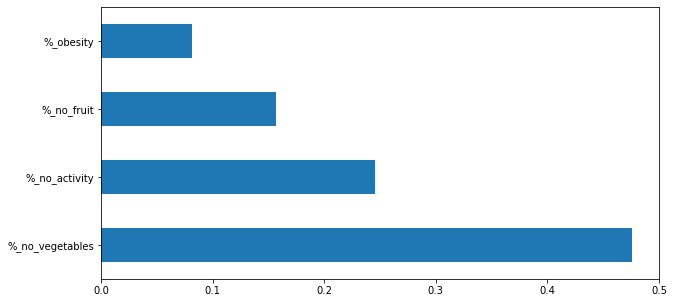

In [1254]:
#Decision Tree Feature Importance
from sklearn.tree import DecisionTreeRegressor

features = list(cardiofe_merged.columns)
features.remove('rate/100000')

cardiofe_merged[features]

X = cardiofe_merged[features].values
y = cardiofe_merged['rate/100000'].values



clf = DecisionTreeRegressor()

clf.fit(X,y)

importance = clf.feature_importances_
plt.figure(figsize=(10,5))
(pd.Series(clf.feature_importances_, index=features)
   .nlargest(4)
   .plot(kind='barh'))

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


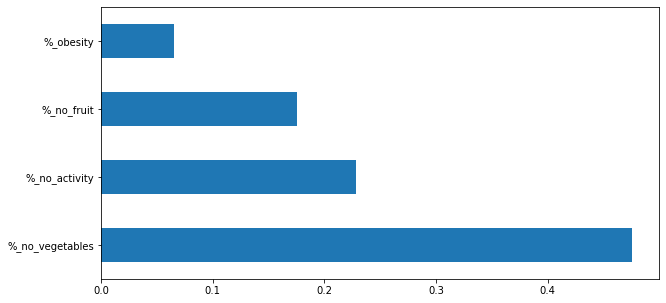

In [1255]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X,y)

plt.figure(figsize=(10,5))
(pd.Series(rf.feature_importances_, index=features)
   .nlargest(4)
   .plot(kind='barh'))


In [1256]:
#Splitting the dataset and scaling

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
